In [240]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# EDA
* Determine datatypes
* Count nulls
* Use visualisations to confirm that we have relatively even representations of all values for all features under consideration

In [241]:
train_data = pd.read_csv("data/train.csv", index_col='PassengerId')
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [253]:
train_data.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

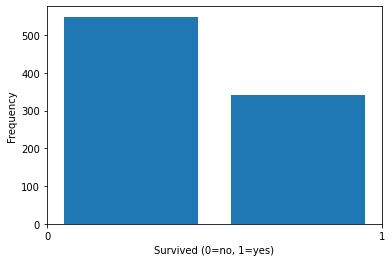

In [243]:
plt.hist(x=train_data.Survived, bins=2, rwidth=0.8)
plt.xticks([0,1])
plt.xlabel("Survived (0=no, 1=yes)")
plt.ylabel("Frequency")
plt.show()

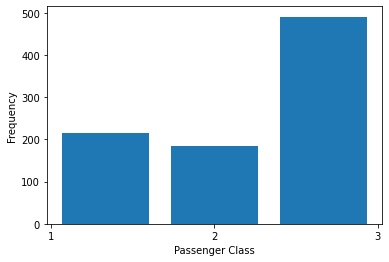

In [244]:
plt.hist(x=train_data.Pclass, bins=3, rwidth=0.8)
plt.xticks([1,2,3])
plt.xlabel("Passenger Class")
plt.ylabel("Frequency")
plt.show()

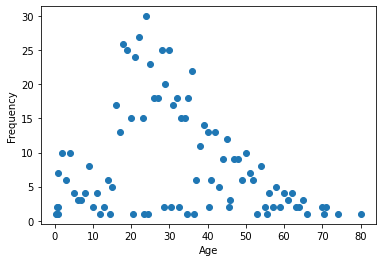

In [245]:
age = train_data.Age
ages_aggregated = age.value_counts(sort=False)
ages_aggregated.sort_index()

plt.scatter(x=ages_aggregated.index, y=ages_aggregated.values)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

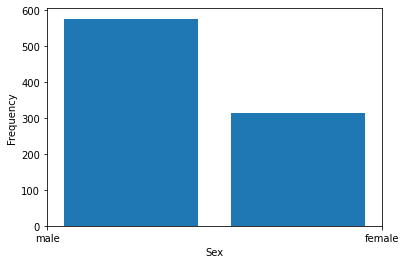

In [246]:
plt.hist(x=train_data.Sex, bins=2,rwidth=0.8)
plt.xticks(['male', 'female'])
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

# Model Creation
* Fit model
* Make predictions on test data
* Save file for uploading

In [247]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch']
X_train = pd.get_dummies(train_data[features])
y_train = train_data['Survived']
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [248]:
test_data = pd.read_csv("data/test.csv", index_col='PassengerId')
test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [249]:
test_data.count()

Pclass      418
Name        418
Sex         418
Age         332
SibSp       418
Parch       418
Ticket      418
Fare        417
Cabin        91
Embarked    418
dtype: int64

In [250]:
X_test = pd.get_dummies(test_data[features])
predictions = model.predict(X_test)

In [251]:
out = pd.DataFrame({'Survived': predictions}, index=test_data.index)
out

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [252]:
out.to_csv('predictions/random-forest.csv', index=True)